In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Подготовка данных

In [2]:
data = pd.read_csv('./01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')
data = data.fillna(0)

In [3]:
ribo_cols = [True if col.find('RPF')>-1 else False for col in data.columns]
ribo_cols[0] = True
ribo_cols = data.columns[ribo_cols]

In [4]:
rna_cols = [True if col.find('RNA')>-1 else False for col in data.columns]
rna_cols[0] = True
rna_cols = data.columns[rna_cols]

In [5]:
ribo_data = data[ribo_cols]
rna_data = data[rna_cols]

1. Для каждого гена найдите коэффициент корреляции числа каунтов между
экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или
Спирмена? Обратите внимание, что перед вами не нормированные каунты.

2. Постройте гистограмму распределения этих коэффициентов корреляции. Для каких
генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это
объяснить?

### Наиболее правильным будет использование корреляции Спирмена, так как каунты ненормированные, а Пирсон хорошо работает только с нормированными данными

Корреляция Пирсона

C:\Users\Admin\miniconda3\envs\default\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


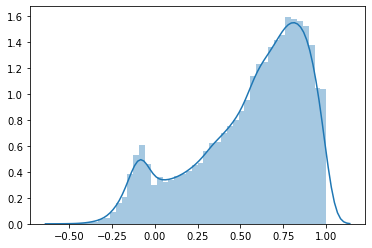

In [6]:
corrs = []
for ribo, rna in zip(ribo_data.iterrows(), rna_data.iterrows()):
    corrs.append(sc.stats.pearsonr(ribo[1][1:], rna[1][1:])[0])
corrs = np.array(corrs)
corrs = corrs[~np.isnan(corrs)]
sns.distplot(corrs)

Корреляция Спирмена

C:\Users\Admin\miniconda3\envs\default\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


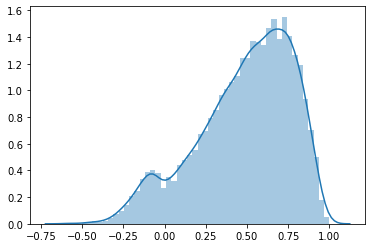

In [7]:
corrs = []
for ribo, rna in zip(ribo_data.iterrows(), rna_data.iterrows()):
    corrs.append(sc.stats.spearmanr(ribo[1][1:], rna[1][1:])[0])
corrs = np.array(corrs)
corrs = corrs[~np.isnan(corrs)]
sns.distplot(corrs)

Топ 10 по с наименьшей корреляцией

In [11]:
data.iloc[abs(corrs).argsort()[:10]]['geneSymbol']

15249       LYRM7
9146         IPMK
2154       ADRBK2
10788       SYNPR
16507      ZNF277
3735     C11orf21
7610      SLC38A4
15532      TUBB4B
7393        GTF2B
16431      MAGEA1
Name: geneSymbol, dtype: object

Топ 10 по с наибольшей корреляцией

In [17]:
data.iloc[abs(corrs).argsort()[-10:]]['geneSymbol']

12520       PPM1D
12883        AFF1
16137      ZNF665
12796       KLF11
5311        RAB9B
16433      SLC9A6
7811      ST8SIA2
12917      CORO1B
13136      GOLIM4
16073    HIST1H4J
Name: geneSymbol, dtype: object

#### Не знаю как связать отсутствие корреляции, но если посмотреть топ 5 с наибольшей корреляцией, то среди них 3 гена связанные с "DNA-binding transcription factor activity"

Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и
опухолью. Для этого можете использовать ​DESeq2​ или ​edgeR​ (для DESeq есть ​обёртка
на Python). Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента.
Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались
значимо различны по экспрессии в одном случае, а какие — в другом? Выводы
подкрепите графиками.

#### Ниже подготовка данных для обработки на R (part_1.R)

In [18]:
rna_data.to_csv('./rna_data.tsv', sep='\t', index=False)
ribo_data.to_csv('./ribo_data.tsv', sep='\t', index=False)

In [19]:
ribo_meta = pd.DataFrame()
ribo_meta['label'] = ['normal' if col.find('normal')>-1 else 'tumor' for col in ribo_data.columns[1:]]
ribo_meta.index = ribo_data.columns[1:]
ribo_meta.to_csv('./ribo_meta.tsv', sep='\t', index=False)

In [20]:
rna_meta = pd.DataFrame()
rna_meta['label'] = ['normal' if col.find('normal')>-1 else 'tumor' for col in rna_data.columns[1:]]
rna_meta.index = rna_data.columns[1:]
rna_meta.to_csv('./rna_meta.tsv', sep='\t', index=False)

#### Итоги обработки на R:
#### Результаты дифф экспресси значительно различаются. Rna-seq выделил 930 значимо различимых генов, Ribo-seq - 592. Если посмотреть (глазками) на топ 10 для rna и для ribo я каких-то сильных отличий не нашел (по UniProt), скорее всего надо обрабатывать все различные гены и как-то аггрегировать

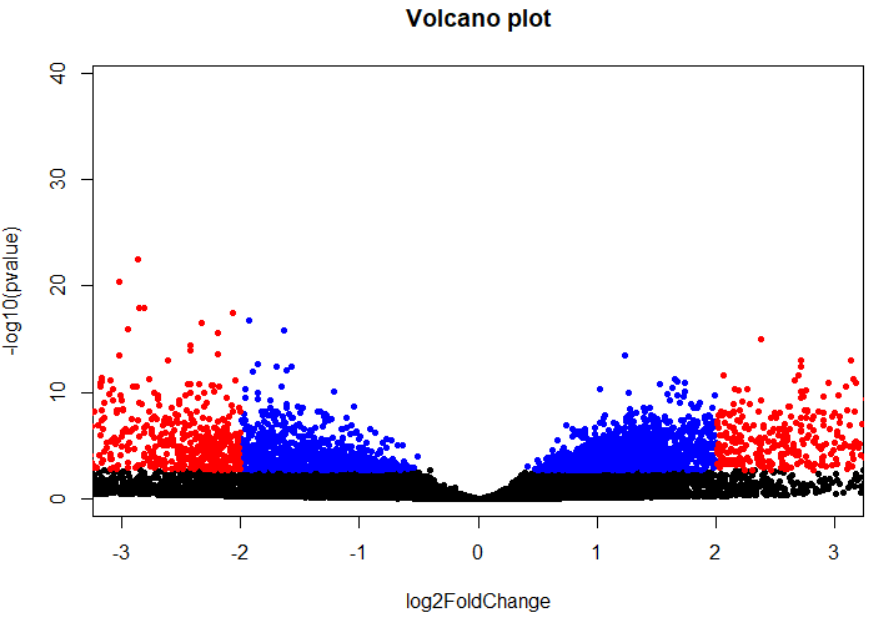

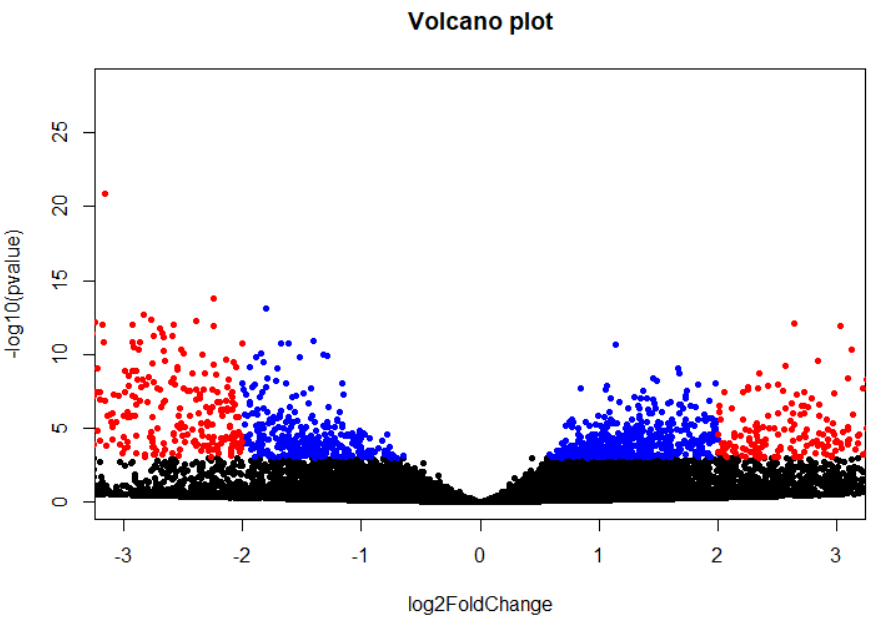